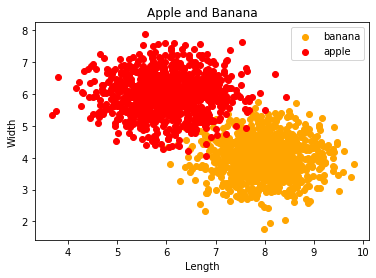

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split

N = 1000

std = 0.6

banana_width = np.random.normal(4, std, N)
banana_length = np.random.normal(8, std, N)

apple_width = np.random.normal(6, std, N)
apple_length = np.random.normal(6, std+0.1, N)

width = np.concatenate((banana_width, apple_width))
length = np.concatenate((banana_length, apple_length))

X = np.array([width, length]).T

banana_label = np.zeros(N, dtype='int')
apple_label = np.ones(N, dtype='int')

Y = np.concatenate((banana_label, apple_label))

plt.scatter(X[0:N, 1], X[0:N, 0], c='orange', label='banana')
plt.scatter(X[N:2*N, 1], X[N:2*N, 0], c='red', label='apple')

plt.xlabel('Length')
plt.ylabel('Width')
plt.title("Apple and Banana")
plt.legend()

In [4]:
class KNearestNeighbors:
    def __init__(self, k):
        self.k = k
        
    def fit(self, X_train, Y_train):
        self.X_train = X_train
        self.Y_train = Y_train
#         self.X_train, self.X_test, self.Y_train, self.Y_test = train_test_split(X, Y, test_size=0.25)
        self.number_class = len(np.unique(Y_train))
        
    def nearestNeighbors(self, X_test):
        distance = np.sqrt(np.sum((X_test - self.X_train)**2, axis = 1))
        near_neighbor = np.argsort(distance)[0:self.k]
        return near_neighbor
    
    def predict(self, X_test):
        near_neighbor = self.nearestNeighbors(X_test)
        y = np.argmax(np.bincount(self.Y_train[near_neighbor]))
        return y

In [8]:
knn = KNearestNeighbors(k=5)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
knn.fit(X_train,Y_train)
y_predict=np.zeros(len(X_test))
for i, test in enumerate(X_test):
    y_predict[i] = knn.predict(test)

FP = np.count_nonzero(Y_test - y_predict)
evaluation = 100 - (FP/len(X_test)*100)
print(evaluation)

98.8


In [26]:
from sklearn.neighbors import KNeighborsClassifier

_rate=[]
knc=KNeighborsClassifier(n_neighbors=5)
knc.fit(X_train,Y_train)
prediction=knc.predict(X_test)
error = np.mean(np.mean(prediction!=Y_test))
evaluation = 100 - (error*100)
print(evaluation)

98.8
